In [13]:
%pylab notebook
from __future__ import print_function
import numpy as np
import pandas as pd
import rasterio
from charistools.hypsometry import Hypsometry
from charistools.modelEnv import ModelEnv
import matplotlib.pyplot as plt
from netCDF4 import Dataset

from charistools.readers import ModisTileCube

Populating the interactive namespace from numpy and matplotlib


In [10]:
%cd /vagrant/source/charistools/test/
%ls


/vagrant/source/charistools/test
all_tests.py                test_convertors.py~  test_modis_tile_bounds.py
all_tests.pyc               test_convertors.pyc  test_modis_tile_bounds.pyc
compare/                    test_files/          test_readers.py
__init__.py                 test_hypsometry.py   test_readers.py~
__init__.pyc                test_hypsometry.pyc  test_readers.pyc
melt_model_config.ini       test_meltModels.py   test_soi.py
melt_model_config.ini~      test_meltModels.py~  test_soi.py~
modis_tiles_config.ini      test_meltModels.pyc  test_soi.pyc
SOI_by_elev.2001.0100m.txt  test_modelEnv.py     test_sol.py
test_convertors.py          test_modelEnv.pyc


In [11]:
newFile = 'SOI_by_elev.2001.0100m.txt'
new_hyps = Hypsometry(filename=newFile)
new_hyps.print()


# Hypsometry created : 2016-05-04 16:01:46.707046
# Elevations in meters, contour at bottom of elevation band
# Snow_on_ice area in square km
# Files used to derive this hypsometry data:
# h23v05: basin_mask   : /projects/CHARIS/charistools_test_data/basin_masks/IN_Hunza_at_Danyour.basin_mask.h23v05.tif
# h23v05: dem          : /projects/CHARIS/charistools_test_data/SRTMGL3/SRTMGL3.v0.1.h23v05.tif
# h23v05: modice       : /projects/CHARIS/charistools_test_data/modicev04/MODICE.v0.4.h23v05.1strike.min05yr.mask.nc
# h23v05: fSCA         : /projects/CHARIS/charistools_test_data/snow_cover/MODSCAG_GF/MODSCAG_GF_Snow.v0.5.h23v05_2001.h5
# h23v05: discriminator (threshold=0.46): /projects/CHARIS/charistools_test_data/albedo/MOD10A1_GF/MOD10A1_GF_Albedo_shortwave.v0.5.h23v05_2001.h5
# h24v05: basin_mask   : /projects/CHARIS/charistools_test_data/basin_masks/IN_Hunza_at_Danyour.basin_mask.h24v05.tif
# h24v05: dem          : /projects/CHARIS/charistools_test_data/SRTMGL3/SRTMGL3.v0.1.h24v05.tif

In [12]:
origFile = 'compare/IN_Hunza_at_Danyour.2001.0100m.ALBEDO_MOD10A1.0046.snow_on_ice_area.dat'
orig_hyps = Hypsometry(filename=origFile)
orig_hyps.print()


# Hypsometry calculated from:
# /projects/CHARIS/snow_cover/MODSCAG_GF/v04/h23v05/MODSCAG_GF_Snow.v0.4.h23v05_2001.h5
# /projects/CHARIS/albedo/MOD10A1_Collection_005/MOD10A1_005_GF/v04/h23v05/MOD10A1_GF_albedo_shortwave.v0.4.h23v05_2001.h5
# /projects/CHARIS/snow_cover/modice.v0.4/min05yr_geotiff/MODICE.v0.4.h23v05.1strike.min05yr.mask.tif
# /projects/CHARIS/basins/basin_MODIS_tiles/h23v05/IN_Hunza_at_Danyour_h23v05.tif
# /projects/CHARIS/elevation_data/SRTMGL3/SRTMGL3.v0.1.h23v05.tif
# /projects/CHARIS/snow_cover/MODSCAG_GF/v04/h24v05/MODSCAG_GF_Snow.v0.4.h24v05_2001.h5
# /projects/CHARIS/albedo/MOD10A1_Collection_005/MOD10A1_005_GF/v04/h24v05/MOD10A1_GF_albedo_shortwave.v0.4.h24v05_2001.h5
# /projects/CHARIS/snow_cover/modice.v0.4/min05yr_geotiff/MODICE.v0.4.h24v05.1strike.min05yr.mask.tif
# /projects/CHARIS/basins/basin_MODIS_tiles/h24v05/IN_Hunza_at_Danyour_h24v05.tif
# /projects/CHARIS/elevation_data/SRTMGL3/SRTMGL3.v0.1.h24v05.tif
            1400.  1500.  1600.  1700.  1800.  1

<IPython.core.display.Javascript object>


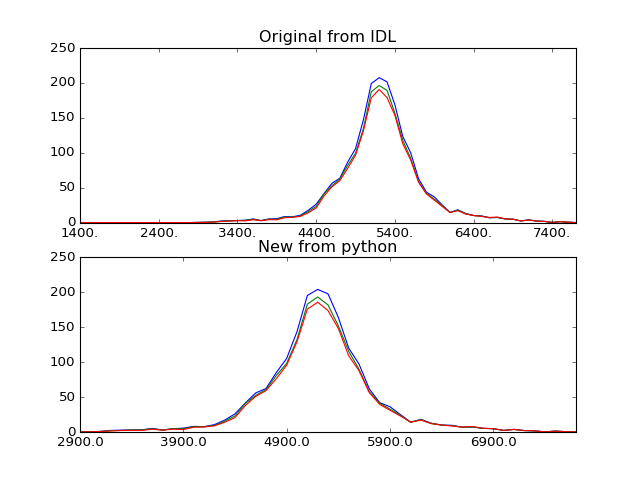

In [32]:
fig, ax = plt.subplots(2,1)
orig_hyps.data.ix['2001-01-01'].plot(ax=ax[0])
orig_hyps.data.ix['2001-01-02'].plot(ax=ax[0])
orig_hyps.data.ix['2001-01-03'].plot(ax=ax[0])
ax[0].set_title('Original from IDL')
new_hyps.data.ix['2001-01-01'].plot(ax=ax[1])
new_hyps.data.ix['2001-01-02'].plot(ax=ax[1])
new_hyps.data.ix['2001-01-03'].plot(ax=ax[1])
ax[1].set_title('New from python')
plt.show()

In [33]:
diff = new_hyps.data.subtract(other=orig_hyps.data, fill_value=0.)

In [34]:
diff

,1400.,1500.,1600.,1700.,1800.,1900.,2000.,2100.,2200.,2300.,...,7300.,7300.0,7400.,7400.0,7500.,7500.0,7600.,7600.0,7700.,7700.0
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.76,1.61,-0.16,0.16,-1.32,1.32,-0.50,0.50,0.0,0.0
2001-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.62,1.62,-0.16,0.16,-1.27,1.27,-0.49,0.49,0.0,0.0
2001-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.63,1.63,-0.17,0.17,-1.23,1.23,-0.49,0.49,0.0,0.0


<IPython.core.display.Javascript object>


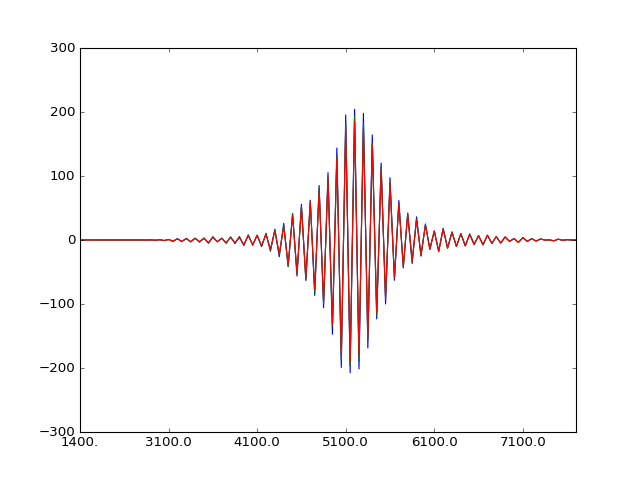

In [35]:
fig, ax = plt.subplots(1,1)
diff.ix['2001-01-01'].plot()
diff.ix['2001-01-02'].plot()
diff.ix['2001-01-03'].plot()
plt.show()


In [ ]:
mod10 = mod10_cube.read(1)
print(mod10.shape)
np.amin(mod10), np.amax(mod10)

In [ ]:
f = Dataset(mod10a1_filename, 'r', 'HDF5')
d = f.groups['500m'].variables['fsca']

In [ ]:
d

In [ ]:
forig = Dataset(modscag_filename, 'r', 'HDF5')
dorig = forig.groups['500m'].variables['fsca']
dorig